In [ ]:
import json
from glob import glob
import numpy as np
from collections import defaultdict
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
from pathlib import Path
from plot_utils import npflatten

%load_ext autoreload
%autoreload 2

In [ ]:
from matplotlib import rcParams
# rcParams.update(matplotlib.rcParamsDefault)
params = {
#    'axes.labelsize': 8,
   'font.size': 14,
    
#    'legend.fontsize': 14,
#    'xtick.labelsize': 10,
#    'ytick.labelsize': 10,
   'text.usetex': False,
#    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)

In [ ]:
# folder structure is as follows:
# /results/{algorithm}/{chid}/{date}/
# algorithm: specific optimization algorithm
# chid: refers to a CHEMBL assay id. 
# date: folders for different runs. the date/time refers to when the run finished

from plot_utils import load_chid
results_dir = Path('results')
algorithm = 'graph_ga'
chids = os.listdir(results_dir/algorithm)


        
    
order = ['Split1', 'Split2', 'Split1_alt']
col_dict = {'Split1': 'blue', 'Split2': 'red', 'Split1_alt': 'green'}
legend_dict = {'Split1':'Optimizer',
               'Split2': 'Control',
               'Split1_alt': 'Control 2'}

CHEMBL3888429
CHEMBL1909203
CHEMBL1909140


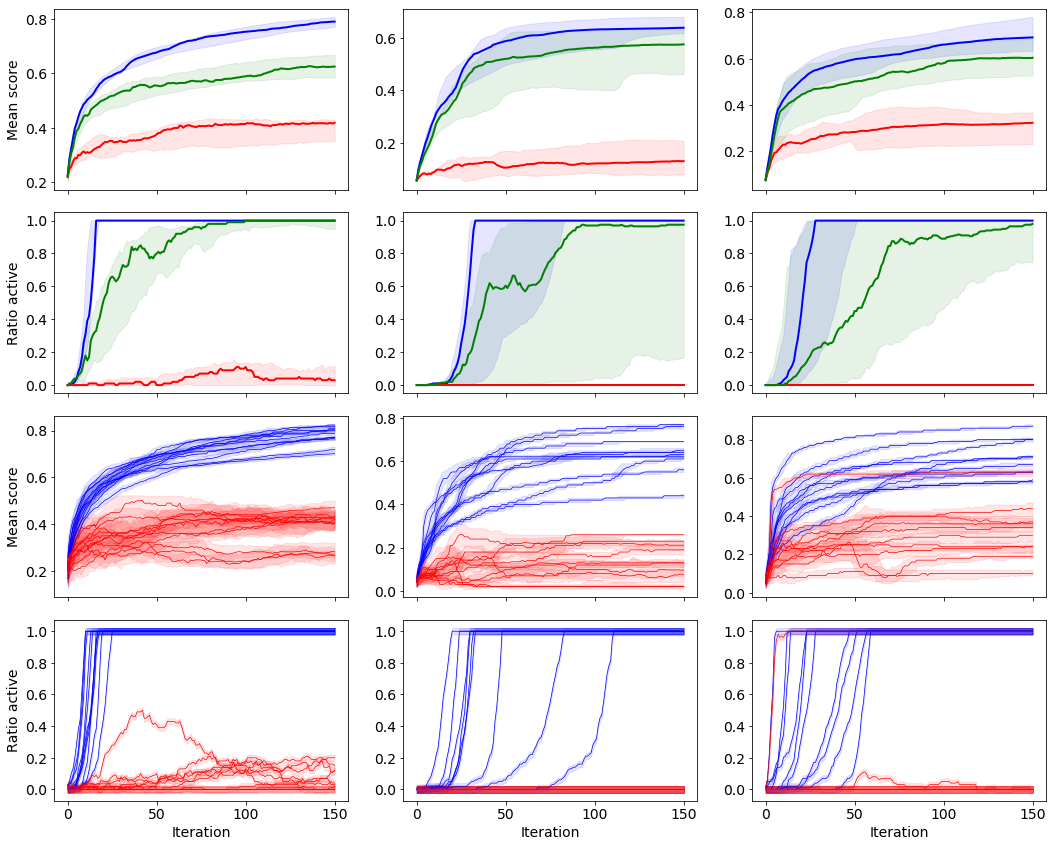

In [ ]:
from plot_utils import median_score_single, ratio_active_single, median_score_compound, ratio_active_compound, plot_wrapper



#     plt.savefig(summary_dir/f'{name}.pdf')
#     plt.savefig(summary_dir/f'{name}.jpg')
#     plt.show()
#     plt.clf()


xlabel=None
ms = 'Mean score'
ra = 'Ratio active'

fig, axes = plt.subplots(nrows=4, ncols=len(chids), figsize=(15,12), sharex=True)

for i, chid in enumerate(chids):
    print(chid)
    summary_dir = results_dir/algorithm/chid/'summary'
    os.makedirs(summary_dir, exist_ok=True)
    
    preds_internal, preds_external, aucs = load_chid(results_dir/algorithm/chid, order)
    
    
    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel, ylabel=ms, col_dict=col_dict, skip=None, ax=axes[0][i], legend=False, lw=2)
    plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel, ylabel=ra, col_dict=col_dict, skip=None, ax=axes[1][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms, col_dict=col_dict, skip=True, ax=axes[2][i],legend=False, lw=0.7)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, ratio_active_single, name='ratio_active_single', xlabel=xlabel, ylabel=ra, col_dict=col_dict, skip=True, ax=axes[3][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None
    
fig.tight_layout()

#  Not refactored yet


(10, 151, 100)


KeyboardInterrupt: 

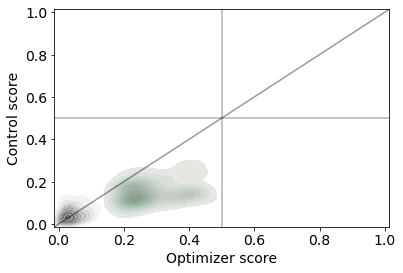

In [ ]:
scatter_kde = summary_dir/'scatter_kde'
os.makedirs(scatter_kde, exist_ok=True)

alpha=0.3
print(pred1_all.shape)
n_ext = 1000

for it in range(pred1_all.shape[1]):
#     fig = plt.figure(figsize=(5,5))
    for run in range(pred1_all.shape[0]):
#         plt.scatter(ext1_all[run][:n_ext], ext2_all[run][:n_ext], s=1, c='black', alpha=0.2)
#         plt.scatter(pred1_all[run, it], pred2_all[run, it], s=3)
        sns.kdeplot(pred1_all[run, it], pred2_all[run, it], shade=True,shade_lowest=False, alpha=0.2)
    sns.kdeplot(ext1_all[run][:n_ext], ext2_all[run][:n_ext], shade=True,shade_lowest=False, alpha=0.5, cmap='Greys')



    plt.axvline(0.5, c='black', alpha=alpha)
    plt.axhline(0.5, c='black',alpha=alpha)
    plt.xlabel('Optimizer score')
    plt.ylabel('Control score')
#         plt.legend(loc=2)
        
    plt.xlim((-0.013,1.013))
    plt.ylim((-0.013,1.013))
    plt.plot((-0.013,1.013), (-0.013,1.013), c='black', alpha=0.4)
    plt.savefig(scatter_kde/f'{it:03}')
#     break
#     plt.show()
    plt.clf()

In [ ]:
alpha=0.3
print(pred1_all.shape)
n_ext = 1000


resh1 = pred1_all.transpose(1,0,2).reshape(151,-1)
resh2 = pred2_all.transpose(1,0,2).reshape(151,-1)

(2, 151, 100)


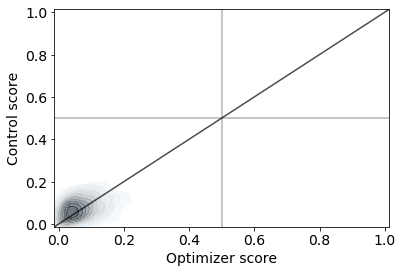

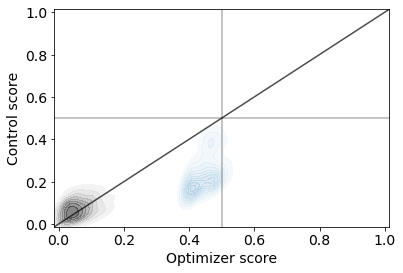

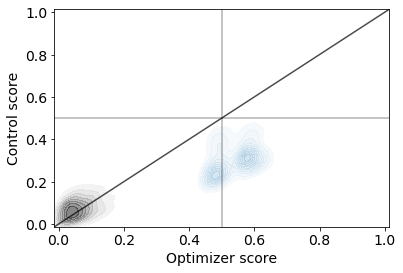

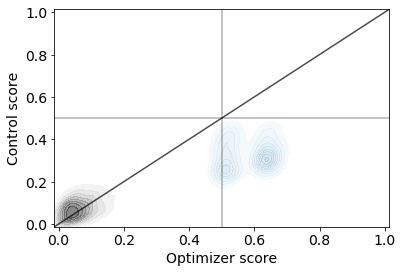

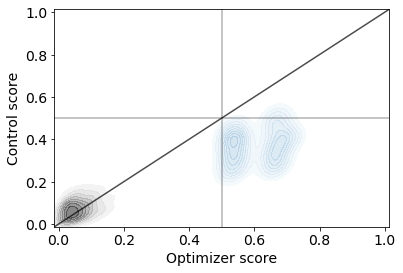

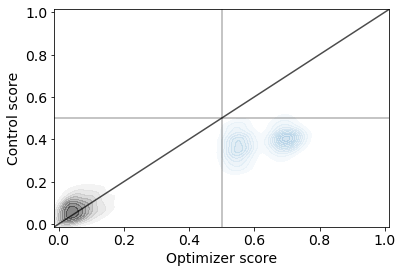

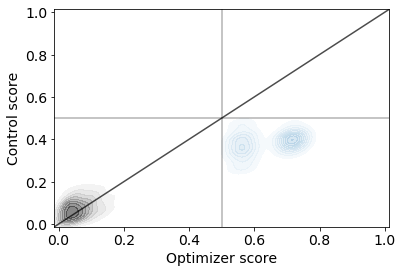

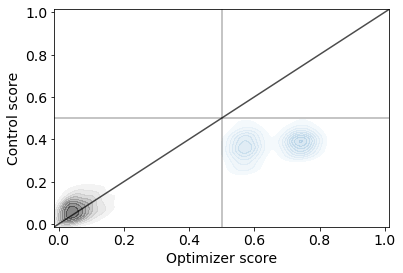

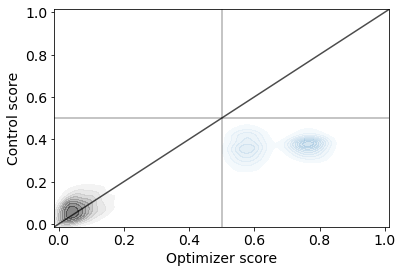

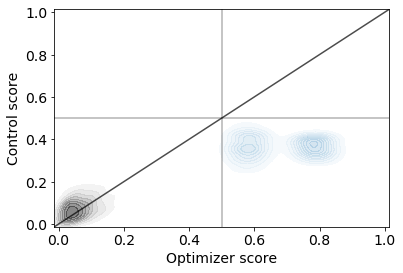

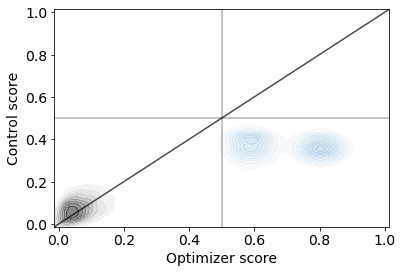

<Figure size 432x288 with 0 Axes>

In [ ]:
for r1, r2 in list(zip(resh1, resh2))[::15]:
    sns.kdeplot(r1, r2, shade=True,shade_lowest=False, alpha=0.2)
#     plt.scatter(r1, r2)
    sns.kdeplot(ext1_all[0][:n_ext], ext2_all[0][:n_ext], shade=True,shade_lowest=False, alpha=0.5, cmap='Greys')


    plt.axvline(0.5, c='black', alpha=alpha)
    plt.axhline(0.5, c='black',alpha=alpha)
    plt.xlabel('Optimizer score')
    plt.ylabel('Control score')
    #         plt.legend(loc=2)

    plt.xlim((-0.013,1.013))
    plt.ylim((-0.013,1.013))
    plt.plot((-0.013,1.013), (-0.013,1.013), c='black', alpha=0.7)
    #     plt.savefig(summary_dir/'scatter'/f'{it:03}')
    #     break
    plt.show()
    plt.clf()

In [ ]:
# summary_dir/'scatter'

# import subprocess
# animation_file = summary_dir/'animation_scatter.gif'
# scatter_glob = summary_dir/'scatter/*'
# subprocess.run(["convert", "-delay 5", "-loop 0", scatter_glob, animation_file])